- Is the website redesign any good?

> H0: The website design is good<b>

> Ha: The website design is not good<b>
    
------------------------------------------------------------------------    

True negative: design is good & accepted design is good


------------------------------------------------------------------------    


Type  I: design is good but reject design good 

------------------------------------------------------------------------    

Type II: design is not good but accept as good 

------------------------------------------------------------------------    

True positive: design is not good and reject design is good
    



- Is our television ad driving more sales?

> H0: The tv ads drive more sales<b>

> Ha: The tv ads does not drive more sales<b>
    
------------------------------------------------------------------------    

True negative: ads drive more sales and accept ads do drive more sales


------------------------------------------------------------------------    


Type  I: ads drive more sales BUT reject ads drive more sales 

------------------------------------------------------------------------    

Type II: ads do not drive more sales BUT accept ads drive more sales  

------------------------------------------------------------------------    

True positive: ads do not drive more sales and reject ads drive more sales


- Has the network latency gone up since we switched internet service providers?

> H0: network latency is related to the change in service provider <b>

> Ha: network latency is not related to the change in service provider <b>
    
------------------------------------------------------------------------    

True negative: network latency is related to the change in service provider, accept the relationship


------------------------------------------------------------------------    


Type  I: network latency is related to the change in service provider, BUT reject the relationship 

------------------------------------------------------------------------    

Type II: network latency is NOT related to the change in service provider, BUT accept the relationship  

------------------------------------------------------------------------    

True positive: network latency is NOT related to the change in service provider, and also reject the relationship  

In [1]:
from math import sqrt
from scipy import stats

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. 

- A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. 


- A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. 


- Use a .05 level of significance.

> H0: No difference in avg home selling time between two offices
    
> Ha: Average time it takes to sell homes is different for its two offices 

In [180]:
dist_1 = stats.norm(90, 15).rvs(40)
dist_2 = stats.norm(100,20).rvs(50)

# n1 = 40
# n2 = 50

# μ1 = 90
# μ2 = 100

# σ1 = 15
# σ2 = 20

# α = 0.05

print(stats.ttest_ind(dist_1, dist_2))
# Reject H0, Average time is different, p-value of 0.0092 

Ttest_indResult(statistic=-2.6626664253369667, pvalue=0.009217032158420223)


Load the mpg dataset and use it to answer the following questions:

- Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

- Are compact cars more fuel-efficient than the average car?

- Do manual cars get better gas mileage than automatic cars?

In [181]:
from pydataset import data

In [183]:
mpg = data("mpg")
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

- H0: There is no difference in fuel-efficiency in cars from 2008 vs 1999
- Ha: There is difference in fuel-efficiency in cars from 2008 vs 1999
- set α = 0.05

> p-value = 0.82 > α, fail to reject H0, might be no difference

In [214]:
mpg["avg_mileage"] = (mpg.cty + mpg.hwy)/2
mpg_1999 = mpg[mpg["year"] == 1999].avg_mileage
mpg_2008 = mpg[mpg["year"] == 2008].avg_mileage

t_mpg = (stats.ttest_ind(mpg_1999 , mpg_2008))
t_mpg

Ttest_indResult(statistic=0.21960177245940962, pvalue=0.8263744040323578)

Are compact cars more fuel-efficient than the average car?
- H0: There is no difference in fuel-efficiency between compact cars and other cars
- Ha: There is a difference in fuel-efficiency between compact cars and other cars
- set α = 0.05

> p-value = 1.31e-10 < α, reject H0, there is a difference in fuel-efficiency between compact car and the others

In [45]:
mpg_compact = mpg[mpg["class"] == "compact"].avg_mileage
mpg_not_compact = mpg[mpg["class"] != "compact"].avg_mileage

t_class = (stats.ttest_ind(mpg_compact , mpg_not_compact))
t_class


Ttest_indResult(statistic=6.731177612837954, pvalue=1.3059121585018135e-10)

Do manual cars get better gas mileage than automatic cars?
- H0: There is no difference in fuel-efficiency between manual and auto cars
- Ha: There is a difference in fuel-efficiency between manual and auto cars
- set α = 0.05

> p-value = 7.15e-6 < α, reject H0

In [48]:
manual_car = mpg[mpg["trans"].str.contains("man")].avg_mileage
auto_car = mpg[mpg["trans"].str.contains("auto")].avg_mileage
stats.ttest_ind(manual_car, auto_car)

# alternative
# mpg['is_auto'] = mpg['trans'].apply(lambda x: 'auto' in x)
# manual = mpg[~mpg['is_auto']]['mpg']
# auto = mpg[mpg['is_auto']]['mpg']

Ttest_indResult(statistic=4.593437735750014, pvalue=7.154374401145683e-06)

**Use telco_churn data.**
- Does tenure correlate with monthly charges? Total charges? 
- What happens if you control for phone and internet service?

In [186]:
def get_db_url():
    url = f'mysql+pymysql://{user}:{password}@{host}/{database_name}'
    return url
from env import host, user, password
database_name = input("Input desired database name: ")
query = input("Key in the query ")
customer = pd.read_sql(query,get_db_url())
customer.head(5)

Input desired database name: telco_churn
Key in the query select * from customers


,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.6,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.9,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.9,267.4,Yes


In [187]:
# df = df[["drop_col1","drop_col2"]]
customer.total_charges = customer.total_charges.str.replace(" ","")
# df = df[df.total_charges != ' ']
# SQL_syntax WHERE total_charges != ' '
customer.total_charges = pd.to_numeric(customer.total_charges)
customer.total_charges = customer.total_charges.astype(float)

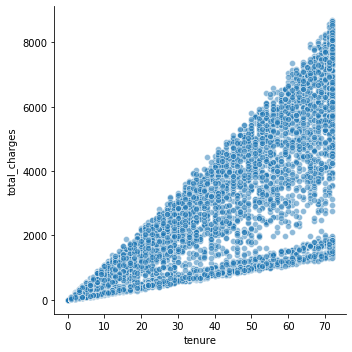

In [280]:
# alpha, add hue and col
sns.relplot(data = customer, y = 'total_charges', x = 'tenure', alpha = .5)

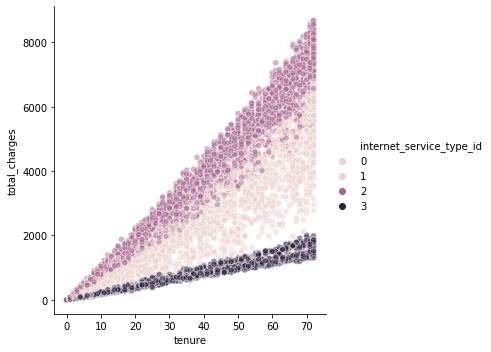

In [283]:
# alpha, add hue and col
sns.relplot(data = customer, y = 'total_charges', x = 'tenure', alpha = .5, hue = 'internet_service_type_id')

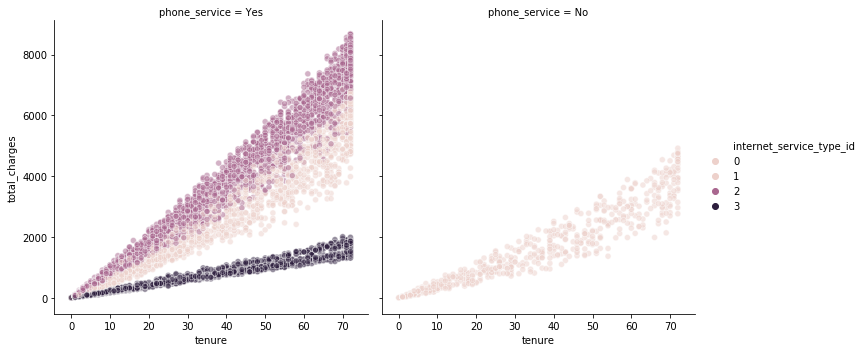

In [284]:
# alpha, add hue and col
sns.relplot(data = customer, y = 'total_charges', x = 'tenure', alpha = .5, hue = 'internet_service_type_id', col = 'phone_service')

In [190]:
r, p = stats.pearsonr(customer.tenure, customer.monthly_charges)
print(r,p)
# It is statistically significant that monthly charge is slightly correlated to tenure

0.24789985628615002 4.0940449915016345e-99


In [191]:
r, p = stats.pearsonr(customer.tenure, customer.total_charges)
print(r,p)
# the result that there's strong correlation between the two variables is statistically significance

0.8261783979502421 0.0


In [ ]:
no_internet = df[df.internet_service_type == 'None']
stats.pearsonr(no_internet.tenure, no_internet.total_charges)
no_internet.plot.scatter(y = 'total_charges', x = 'tenure')

In [192]:
has_internet = customer.internet_service_type_id > 1
has_phone = customer.phone_service == "Yes"

stats.pearsonr(customer.tenure[has_internet], customer.monthly_charges[has_internet]) 
# Slight positive correlation, statistically significant

(0.20311259168306733, 3.1201721018835015e-44)

In [193]:
stats.pearsonr(customer.tenure[has_phone], customer.monthly_charges[has_phone]) 
# Slight positive correlation, statistically significant

(0.24538898585362878, 7.117871077967264e-88)

**Use employees database.**

- Is there a relationship between how long an employee has been with the company and their salary?
- Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [ ]:
# clean, agg in SQL
if(
de.to_date = '9999-01-01', # if this is true,
select max(hire_date) from employees # get this
de.to_date) # if de.to_date != 9999-01-01, do this step

In [194]:
def get_db_url():
    url = f'mysql+pymysql://{user}:{password}@{host}/{database_name}'
    return url
from env import host, user, password
database_name = input("Input desired database name: ")
query = input("Key in the query ")
sal_emp = pd.read_sql(query,get_db_url())
sal_emp.head(5)
# Alternatively, use SQL 
# SELECT DATEDIFF('2019-10-07', to_date) AS tenure from salaries;

Input desired database name: employees
Key in the query select * from employees e join salaries s on e.emp_no = s.emp_no where to_date > now();


,emp_no,birth_date,first_name,last_name,gender,hire_date,emp_no,salary,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,10001,88958,2002-06-22,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,10002,72527,2001-08-02,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,10003,43311,2001-12-01,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,10004,74057,2001-11-27,9999-01-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,10005,94692,2001-09-09,9999-01-01


In [195]:
import datetime as dt
from datetime import timedelta 

In [196]:
#sal_emp["now"] = pd.Timestamp.now().date()
sal_emp["tenure"] = ((pd.Timestamp.now().date()) - sal_emp.hire_date).dt.days.astype(int)
#salary.tenure = salary.tenure.str.strip(" days")
# salary.tenure = salary.tenure.astype(timedelta).map(lambda x: np.nan if pd.isnull(x) else x.days)
sal_emp

,emp_no,birth_date,first_name,last_name,gender,hire_date,emp_no,salary,from_date,to_date,tenure
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,10001,88958,2002-06-22,9999-01-01,12156
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,10002,72527,2001-08-02,9999-01-01,12373
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,10003,43311,2001-12-01,9999-01-01,12093
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,10004,74057,2001-11-27,9999-01-01,11998
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,10005,94692,2001-09-09,9999-01-01,10982
5,10006,1953-04-20,Anneke,Preusig,F,1989-06-02,10006,59755,2001-08-02,9999-01-01,11084
6,10007,1957-05-23,Tzvetan,Zielinski,F,1989-02-10,10007,88070,2002-02-07,9999-01-01,11196
7,10009,1952-04-19,Sumant,Peac,F,1985-02-18,10009,94409,2002-02-14,9999-01-01,12649
8,10010,1963-06-01,Duangkaew,Piveteau,F,1989-08-24,10010,80324,2001-11-23,9999-01-01,11001
9,10012,1960-10-04,Patricio,Bridgland,M,1992-12-18,10012,54423,2001-12-16,9999-01-01,9789


In [173]:
r, p = stats.pearsonr(sal_emp.tenure, sal_emp.salary)
print("Correlation between tenure and salary is: correlation =",r, "with p-value of: ",p)
# Positive correlation between tenure and emp salary

Correlation between tenure and salary is: correlation = 0.30646256131860783 with p-value of:  0.0


**Is there a relationship between tenure and the number of titles they have had?**

- $H0: $ No correlation between tenure and number of titles
- $Hα: $ There is a correlation between tenure and number of titles

In [199]:
def get_db_url():
    url = f'mysql+pymysql://{user}:{password}@{host}/{database_name}'
    return url
from env import host, user, password
database_name = input("Input desired database name: ")
query = input("Key in the query ")
tenure_title = pd.read_sql(query,get_db_url())
tenure_title.head(5)

Input desired database name: employees
Key in the query select datediff(curdate(),e.hire_date) as tenure, count(title) as n_titles from employees as e join titles as t using(emp_no)  group by emp_no;


,tenure,n_titles
0,12157,1
1,12374,1
2,12094,1
3,11999,2
4,10983,2


In [201]:
r, p = stats.pearsonr(tenure_title.tenure, tenure_title.n_titles)
print("Correlation between tenure and title# is: correlation =",r, "with p-value of: ",p)
# There is a slight correlation between the two variables.
# p < 0.05, reject null, there is a correlation between the two variables

Correlation between tenure and title# is: correlation = 0.266598929913662 with p-value of:  0.0


In [ ]:
employees[employees.department.isin(['Sales','Marketing'])]

Use the sleepstudy data. 

**Is there a relationship between days and reaction time?**

In [215]:
sleep = data('sleepstudy')
sleep.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [207]:
stats.pearsonr(sleep.Reaction,sleep.Days) 
# There is a fairly strong positive correlation between day and reaction during sleep

(0.5352302262650253, 9.894096322214812e-15)

__Welcome to CHI SQUARE!__

In [ ]:
# chi2, p, degf, expected = stats.chi2_contingency(observed)

# print('Observed\n')
# print(observed.values)
# print('---\nExpected\n')
# print(expected)
# print('---\n')
# print(f'chi^2 = {chi2:.4f}')
# print(f'p     = {p:.4f}')

Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.
                                      
|              | Codeup_Student | Not_Codeup_Student |
|--------------|----------------|--------------------|
| Mac_User     |       49       |         20         |
| Non-Mac_User |        1       |         30         |

In [211]:
index = ['MAC', 'NONE_MAC']
columns = ['Codeup', 'NONE_Codeup']
MB = pd.DataFrame([[49,20], [1, 30]], index=index, columns=columns)
chi2, p, degf, expected = stats.chi2_contingency(MB)
print("chi-square = ",  chi2)
print("p-value = ", p)

chi-square =  36.65264142122487
p-value =  1.4116760526193828e-09


__Choose another 2 categorical variables from the mpg dataset and perform a $chi^2$ contingency table test with them.__ 

Be sure to state your null and alternative hypotheses.


- $H0: $ Type of drv makes no difference in avg gas mileage
- $Hα: $ There is a relationship between drv and avg gas mileage performance

In [216]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [218]:
chi2, p, degf, expected = stats.chi2_contingency(pd.crosstab(mpg.drv, mpg.avg_mileage))
print("chi-square = ",  chi2)
print("p-value = ", p)
# minimum p-value, reject H0, type of drv do affect avg gas mileage

chi-square =  200.4209027116945
p-value =  9.96172168718799e-13


Use the data from the employees database to answer these questions:

- Is an employee's gender independent of whether an employee works in sales or marketing? (current employees)
- Is an employee's gender independent of whether or not they are or have been a manager?

- # use table: employees (hire_date, gender), departments, dept_manager, dept_emp 

In [229]:
def get_db_url():
    url = f'mysql+pymysql://{user}:{password}@{host}/{database_name}'
    return url
from env import host, user, password
database_name = input("Input desired database name: ")
query = input("Key in the query ")
get_dept = pd.read_sql(query,get_db_url())
get_dept.head(5)

Input desired database name: employees
Key in the query select gender, dept_name     from employees     join dept_emp as de using(emp_no)     join departments using(dept_no)     where de.to_date > now();


,gender,dept_name
0,M,Customer Service
1,F,Customer Service
2,M,Customer Service
3,F,Customer Service
4,F,Customer Service


In [287]:
# use "```sql sql CODE``` to create code snippets

```sql
select gender, dept_name
from employees
join dept_emp as de using(emp_no)
join departments using(dept_no)
where de.to_date > now();
```

In [238]:
get_dept = x['dept_name'].apply(lambda x: x in ['Marketing', 'Sales'])
rel = x[get_dept]
pd.crosstab(rel.gender, rel.dept_name)
chi, p, degf, expected = stats.chi2_contingency(pd.crosstab(rel.gender, rel.dept_name))
print("chi = ", chi, "p = ", p)

chi =  0.3240332004060638 p =  0.5691938610810126


In [ ]:
# select e.gender, count(dm.emp_no) count
#     from employees e
#     left join dept_manager dm on dm.emp_no = e.emp_no
#     group by e.emp_no;

In [228]:
count['mngt'] = count['count'] > 0
chi, p, degf, expected = stats.chi2_contingency(pd.crosstab(count.gender, count.mngt))
print("chi = ", chi, "p = ", p)

chi =  1.4566857643547197 p =  0.22745818732810363


In [265]:
tip = data('tips')
tip.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [235]:
tip.shape

(244, 7)

**$\chi ^2: $ compare two categorical variables**

$ H0: $, two variables are independent

- Generate contingency table with:  **pd.crosstab(v1, v2)**
- Perform test: **stats.chi2_contingency_(contingency_table)**

>**$\chi ^2$ results:**
<br>
> chi2 test statistic
<br>
> p value: if p < α, reject $ H0$
<br>
> degrees of freedom
<br>
> matrix of expected values

> **code - present actual observed vs expected value as visual proof, if o/e similar, fail to reject $ H0$**
<br>
expected = pd.DataFrame(expected, index=['Female', 'Male'], columns=['Non-Smoker', 'Smoker'])
<br>
contingency_table.columns = ['Non-Smoker', 'Smoker']
<br>
contingency_table.index.name = ''
<br>
contingency_table['group'] = 'Actual'
expected['group'] = 'Expected'
<br>
(pd.concat([contingency_table, expected])
.reset_index()
.rename({'index': 'sex'}, axis=1)
.set_index(['group', 'sex']))


$ H0: $ Dine out time (lunch/dinner) is independent of the day of a week.
$ Hα: $ Dine out time (lunch/dinner) is related to the day of a week.

In [248]:
crtb = pd.crosstab(tip.day, tip.time)
chi, p, dgf, e = stats.chi2_contingency(crtb)
print("p-value of the chi test is: {}, thus we reject the null hypothesis".format(p))

p-value of the chi test is: 8.449897551777147e-47, thus we reject the null hypothesis


**Pearson's R: Continuous vs continuous - how variables change together linearly**


test statistics (r) - strength and direction of __linear__ correlation between the 2 variables

$ H0: $ there is no linear correlation between the 2 variables

Pass 2 variables as 2 Series 

- strong: -0.5~-1 or 0.5-1 
- moderate: -0.3~-0.5 or 0.3~0.5
- weak: 0.1~0.3
- no: below 0.1

$ H0: $ There is no linear correlation between tip and total bill.
$ Hα: $ There IS linear correlation between tip and total bill.

In [258]:
r, p = stats.pearsonr(tip.total_bill, tip.tip)
print("Pearson's R: ", r, "with p-value of: ", p)
print("Given the small p-value, we will reject H0 and support there might be a strong correlation between the two variables")

Pearson's R:  0.6757341092113645 with p-value of:  6.692470646863477e-34
Given the small p-value, we will reject H0 and support there might be a strong correlation between the two variables


In [276]:
#dtypes = float64, but still not numeric?

244

**T-test: Continuous vs Categorical**

>**compare means**
- 1 sample: compares the mean for a subgroup against the population mean
- 2 sample: compares the means for two subgroups

$ H0: $ The means between 2 variables are same



To demonstrate, we'll try to answer two different questions:

Is the total bill amount different for smokers?
Is the size of the tip different for parties of 2 and parties of 4?
1 Sample T Test
Is the total bill amount different for smokers?

To answer this question, we need two pieces of information, which we will pass along to scipy:

the total bill amounts for all the smokers
the overall total bill mean
We will feed both of these into the ttest_1samp function from scipy's stats module.

Our null hypothesis is that there is no difference, more formally:

H
0
: The average bill for smokers is no different than the population mean.

- Is there a linear relationship between city mileage and highway mileage?

$H0:$ There is no linear relationship between city and highway mileage

$Ha:$ There is a linear relationship between city and highway mileage

In [5]:
x = mpg.hwy
y = mpg.cty
r, p = stats.pearsonr(x, y)
print(r,p)


0.9559159136495721 1.8683071952629614e-125


Is there a linear relationship between engine displacement(displ) and city mileage (cty)?

$H0:$ There is no linear relationship between engine displacement and city mileage

$Ha:$ There is linear relationship

In [9]:
x = mpg.displ
r,p = stats.pearsonr(x,y)
print("r = ",r, "p-value = ",p)
print("thus there is a negative correlation between engine displacement and city mileage, we reject H0")

r =  -0.7985239689348551 p-value =  4.737914890205637e-53
thus there is a negative correlation between engine displacement and city mileage, we reject H0
